## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128,64], drp_ratio = 0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

Dropout_EXP = [0.2, 0.4, 0.6]


In [8]:
results = {}
for diff_drp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Dropout Ratio = %.2f" % (diff_drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=diff_drp_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "Dropout Ratio %s" % str(diff_drp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Dropout Ratio = 0.20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               

50000/50000 [==============================] - 5s 97us/step - loss: 1.3210 - acc: 0.5295 - val_loss: 1.3345 - val_acc: 0.5264
Epoch 48/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.3055 - acc: 0.5335 - val_loss: 1.3197 - val_acc: 0.5325
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2979 - acc: 0.5334 - val_loss: 1.3172 - val_acc: 0.5356
Epoch 50/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.2993 - acc: 0.5365 - val_loss: 1.3259 - val_acc: 0.5300
Dropout Ratio = 0.40
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)  

Epoch 44/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6161 - acc: 0.4164 - val_loss: 1.4937 - val_acc: 0.4715
Epoch 45/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6077 - acc: 0.4227 - val_loss: 1.4839 - val_acc: 0.4758
Epoch 46/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6024 - acc: 0.4243 - val_loss: 1.4901 - val_acc: 0.4656
Epoch 47/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5980 - acc: 0.4238 - val_loss: 1.4797 - val_acc: 0.4745
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5891 - acc: 0.4286 - val_loss: 1.4782 - val_acc: 0.4708
Epoch 49/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5860 - acc: 0.4315 - val_loss: 1.4686 - val_acc: 0.4720
Epoch 50/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5867 - acc: 0.4316 - val_loss: 1.4734 - val_acc: 0.4815
Dropout Ratio = 0.60
______

50000/50000 [==============================] - 7s 144us/step - loss: 1.9971 - acc: 0.2187 - val_loss: 2.0416 - val_acc: 0.2115
Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9923 - acc: 0.2210 - val_loss: 2.0396 - val_acc: 0.2168
Epoch 42/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9905 - acc: 0.2236 - val_loss: 2.0397 - val_acc: 0.2103
Epoch 43/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.9895 - acc: 0.2245 - val_loss: 2.0256 - val_acc: 0.2152
Epoch 44/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.9885 - acc: 0.2240 - val_loss: 2.0462 - val_acc: 0.2082
Epoch 45/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.9871 - acc: 0.2242 - val_loss: 2.0353 - val_acc: 0.2120
Epoch 46/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9810 - acc: 0.2265 - val_loss: 2.0236 - val_acc: 0.2156
Epoch 47/50
50000/50000 [==============

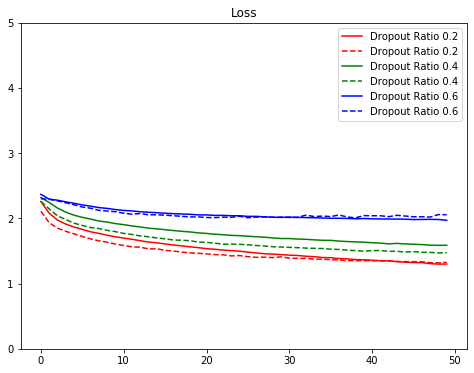

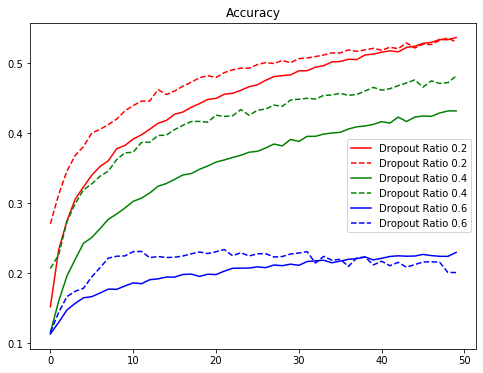

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
results = {}
for diff_drp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Dropout Ratio = %.2f" % (diff_drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=diff_drp_ratio)      
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "Dropout Ratio %s" % str(diff_drp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Dropout Ratio = 0.20
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.0728 - acc: 0.2234 - val_loss: 1.8740 - val_acc: 0.3355
Epoch 2/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.8961 - acc: 0.3080 - val_loss: 1.7810 - val_acc: 0.3631
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8383 - acc: 0.3326 - val_loss: 1.7227 - val_acc: 0.3813
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7976 - acc: 0.3480 - val_loss: 1.7109 - val_acc: 0.3953
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7651 - acc: 0.3636 - val_loss: 1.6646 - val_acc: 0.4100
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7332 - acc: 0.3745 - val_loss: 1.6504 - val_acc: 0.4178
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7078 - acc: 0.3862 - val

50000/50000 [==============================] - 5s 97us/step - loss: 2.0263 - acc: 0.2187 - val_loss: 1.9904 - val_acc: 0.2422
Epoch 10/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0211 - acc: 0.2233 - val_loss: 1.9970 - val_acc: 0.2436
Epoch 11/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0258 - acc: 0.2221 - val_loss: 2.0061 - val_acc: 0.2658
Epoch 12/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0148 - acc: 0.2274 - val_loss: 1.9479 - val_acc: 0.2640
Epoch 13/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0091 - acc: 0.2278 - val_loss: 1.9646 - val_acc: 0.2523
Epoch 14/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0074 - acc: 0.2300 - val_loss: 1.9507 - val_acc: 0.2642
Epoch 15/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.0096 - acc: 0.2282 - val_loss: 2.0893 - val_acc: 0.2272
Epoch 16/50
50000/50000 [=====================

Epoch 18/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3027 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3027 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.3027 - acc: 0.0964 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3027 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 25/50
50000/50000 [========

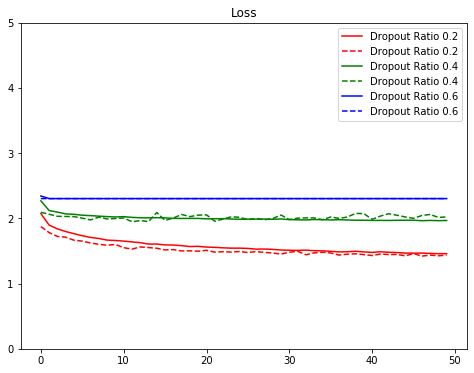

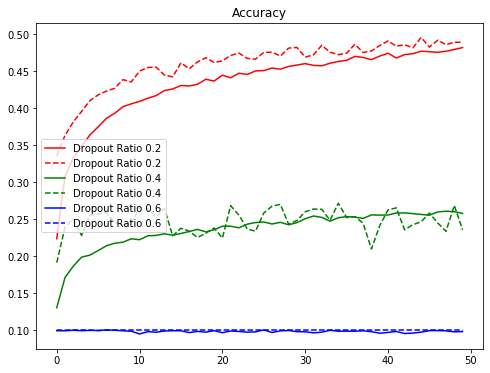

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()